<a href="https://colab.research.google.com/github/robbymugiakbar/Pengolahan-Citra-v2/blob/main/Pengolahan_Citra_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

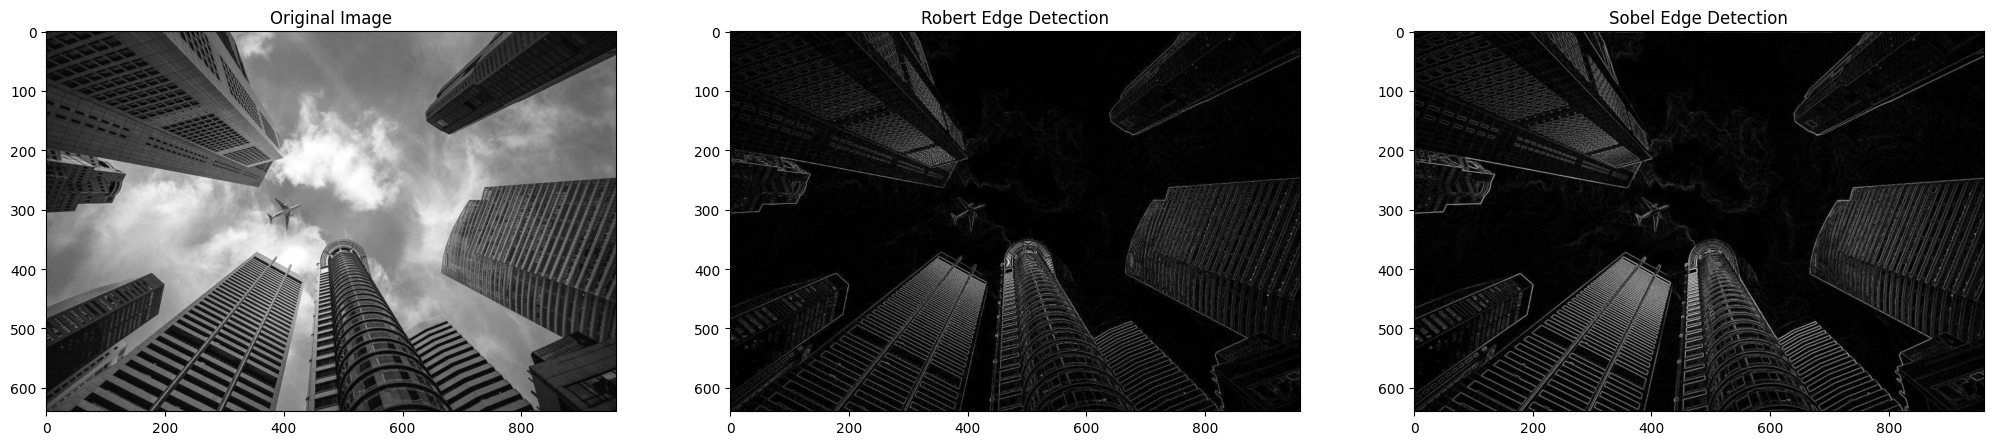

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

# Fungsi untuk mengaplikasikan operator Robert
def robert_operator(image):
    robert_x = np.array([[1, 0], [0, -1]])
    robert_y = np.array([[0, 1], [-1, 0]])

    gradient_x = convolve2d(image, robert_x, mode='same')
    gradient_y = convolve2d(image, robert_y, mode='same')

    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    return gradient_magnitude

# Fungsi untuk mengaplikasikan operator Sobel
def sobel_operator(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    gradient_x = convolve2d(image, sobel_x, mode='same')
    gradient_y = convolve2d(image, sobel_y, mode='same')

    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    return gradient_magnitude

# Fungsi untuk melakukan konvolusi 2D
def convolve2d(image, kernel, mode='same'):
    return np.absolute(np.fft.ifft2(np.fft.fft2(image) * np.fft.fft2(kernel, s=image.shape))).real

# Membaca gambar dalam mode grayscale
image = imageio.imread('/content/sample_data/image.png', mode='L')  # 'L' untuk grayscale

# Mengaplikasikan operator Robert dan Sobel
robert_edge = robert_operator(image)
sobel_edge = sobel_operator(image)

# Menampilkan hasil
plt.figure(figsize=(25, 17))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Robert Edge Detection')
plt.imshow(robert_edge, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Edge Detection')
plt.imshow(sobel_edge, cmap='gray')

plt.show()